### Importing the Necessary Libraries

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [24]:
data = pd.read_csv('df_text_eng.csv')

data.head(10)

,Unnamed: 0,blurb,state
0,1,"Using their own character, users go on educati...",failed
1,2,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,3,"A small indie press, run as a collective for a...",failed
3,4,Zylor is a new baby cosplayer! Back this kicks...,failed
4,5,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed
5,6,FastMan is a Infinite running platformer. Go i...,failed
6,7,FADE. A dark and somber RPG about survival and...,failed
7,8,The next generation of space combat with onlin...,failed
8,9,Whip around planets and smash your way to vict...,failed
9,10,"Sneak in, find treasures, avoid cats and colle...",failed


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215513 entries, 0 to 215512
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  215513 non-null  int64 
 1   blurb       215510 non-null  object
 2   state       215513 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.9+ MB


### Exploratory Data Analysis

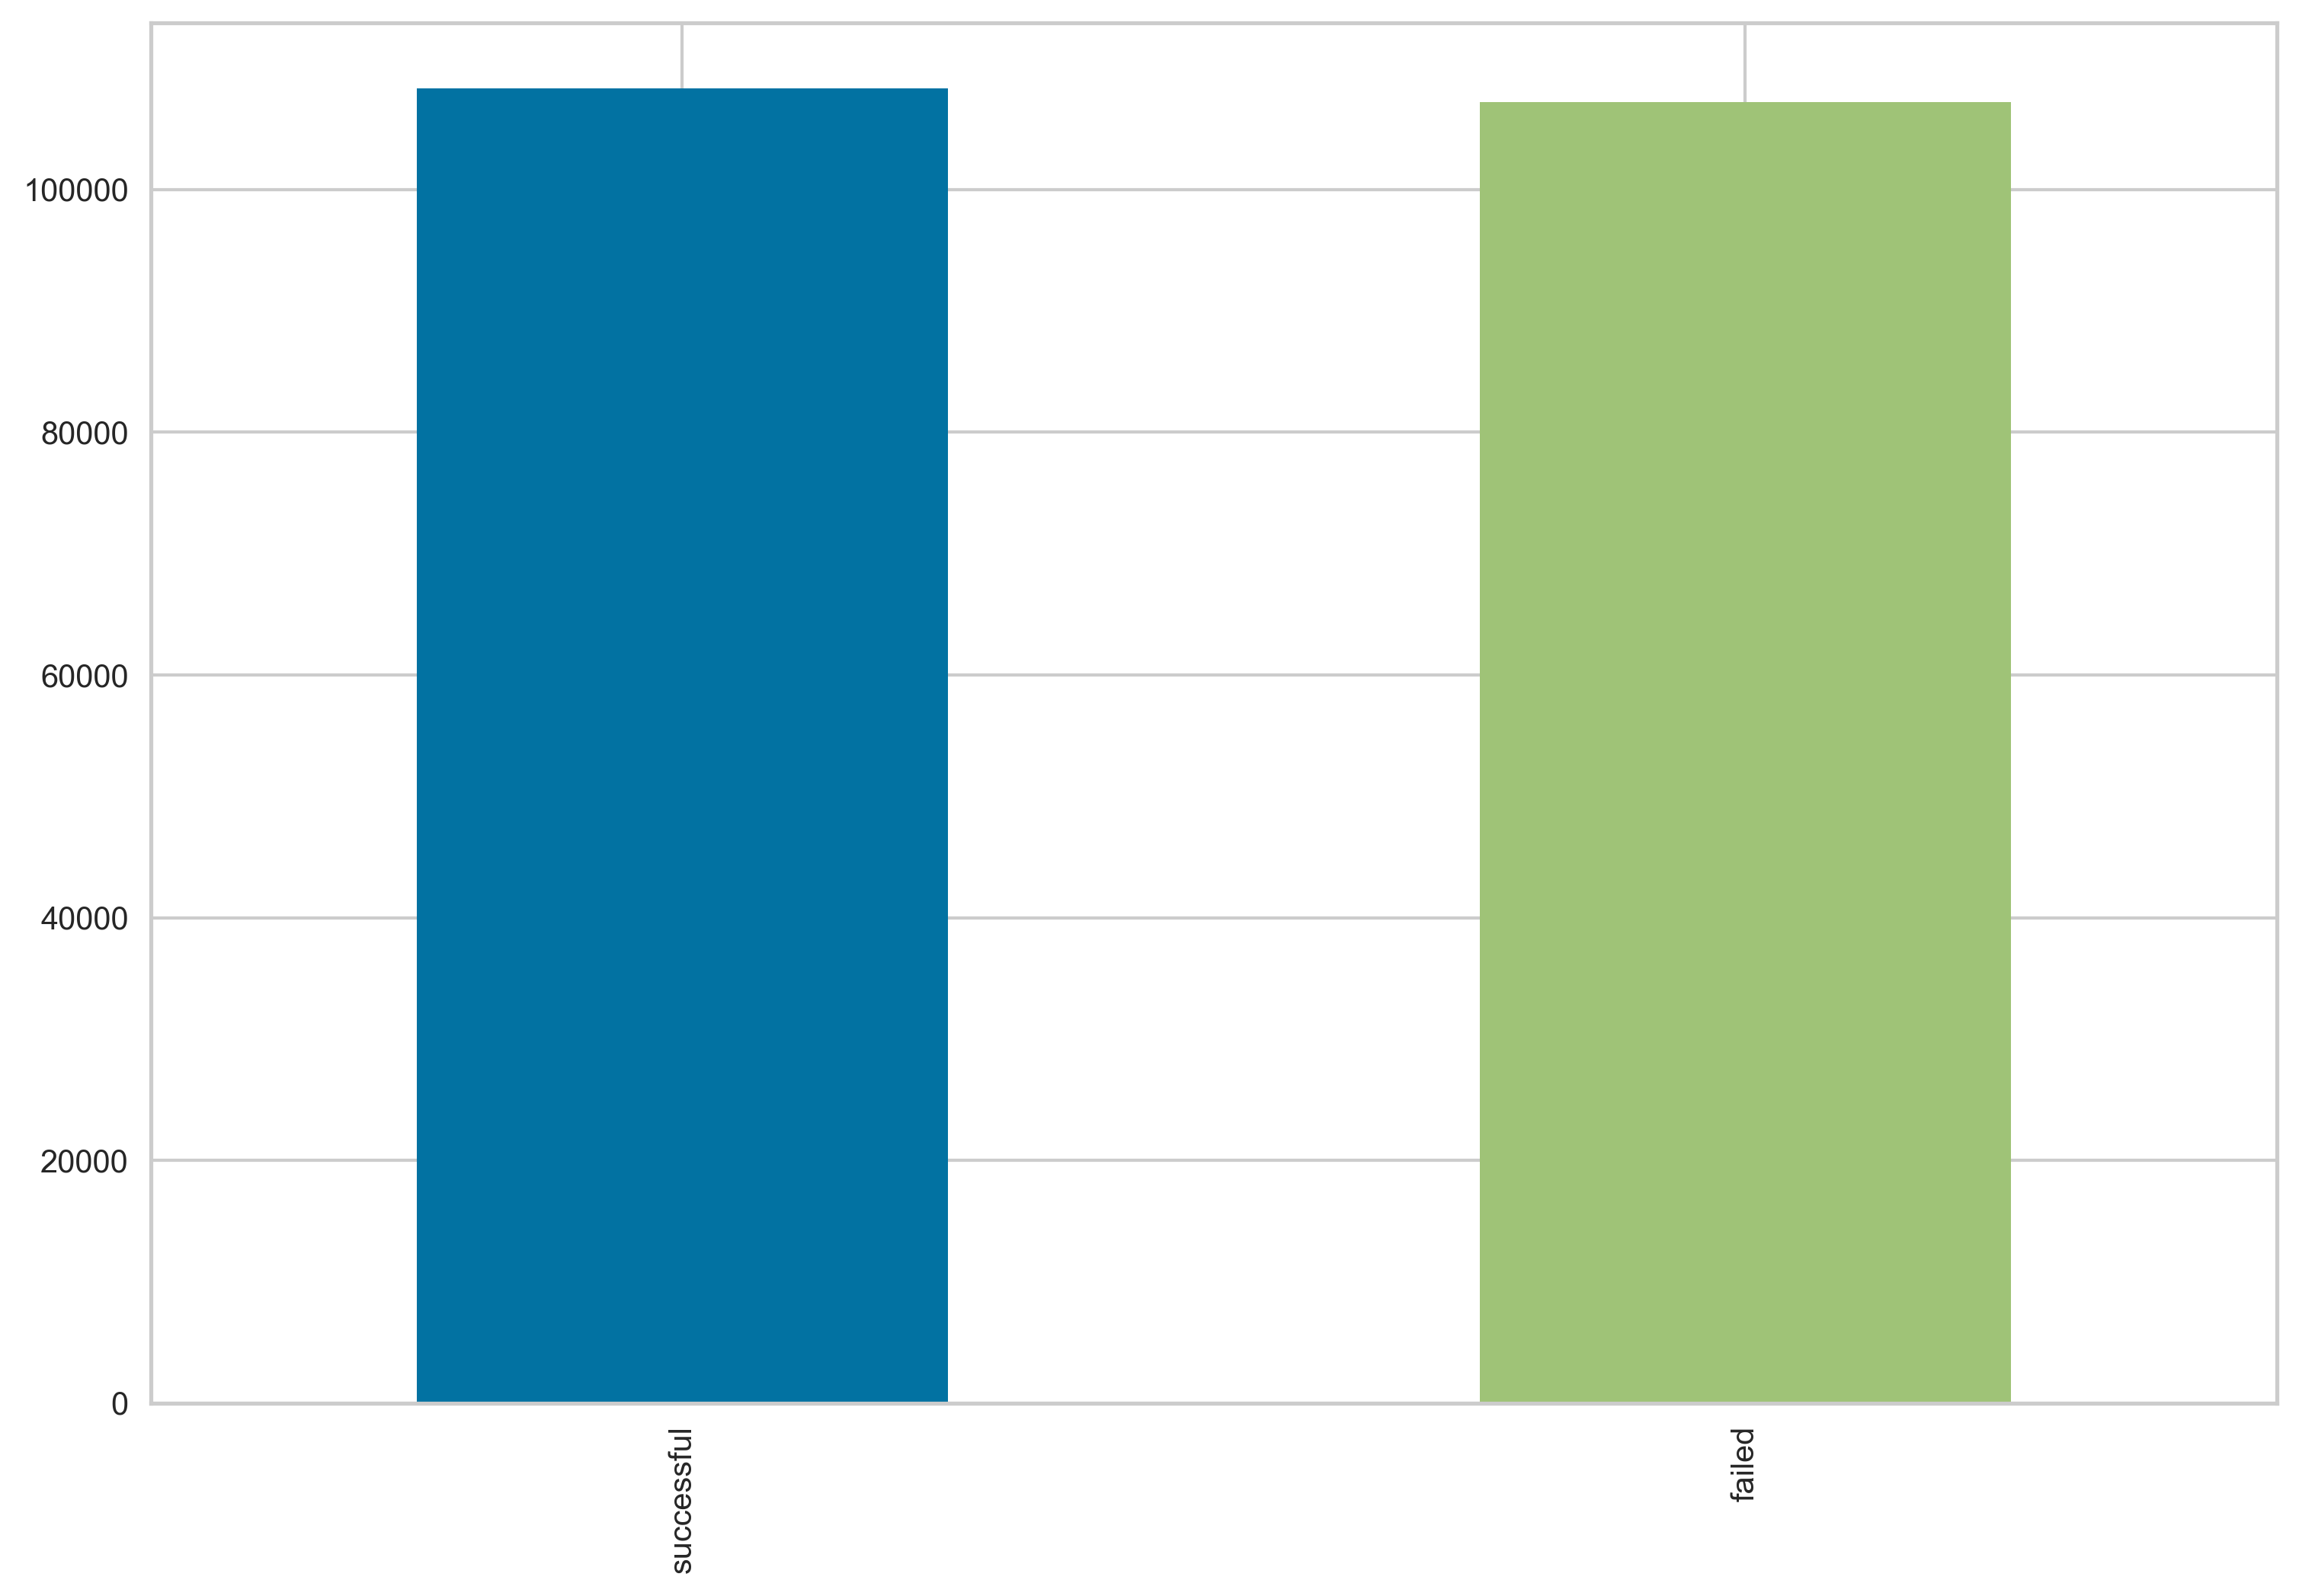

In [34]:
color = ['C0', 'C1', 'C2', 'C3', 'C4']

categories = data['state'].value_counts()
categories.plot(kind = 'bar', figsize = (12,8), color = color)

plt.show()

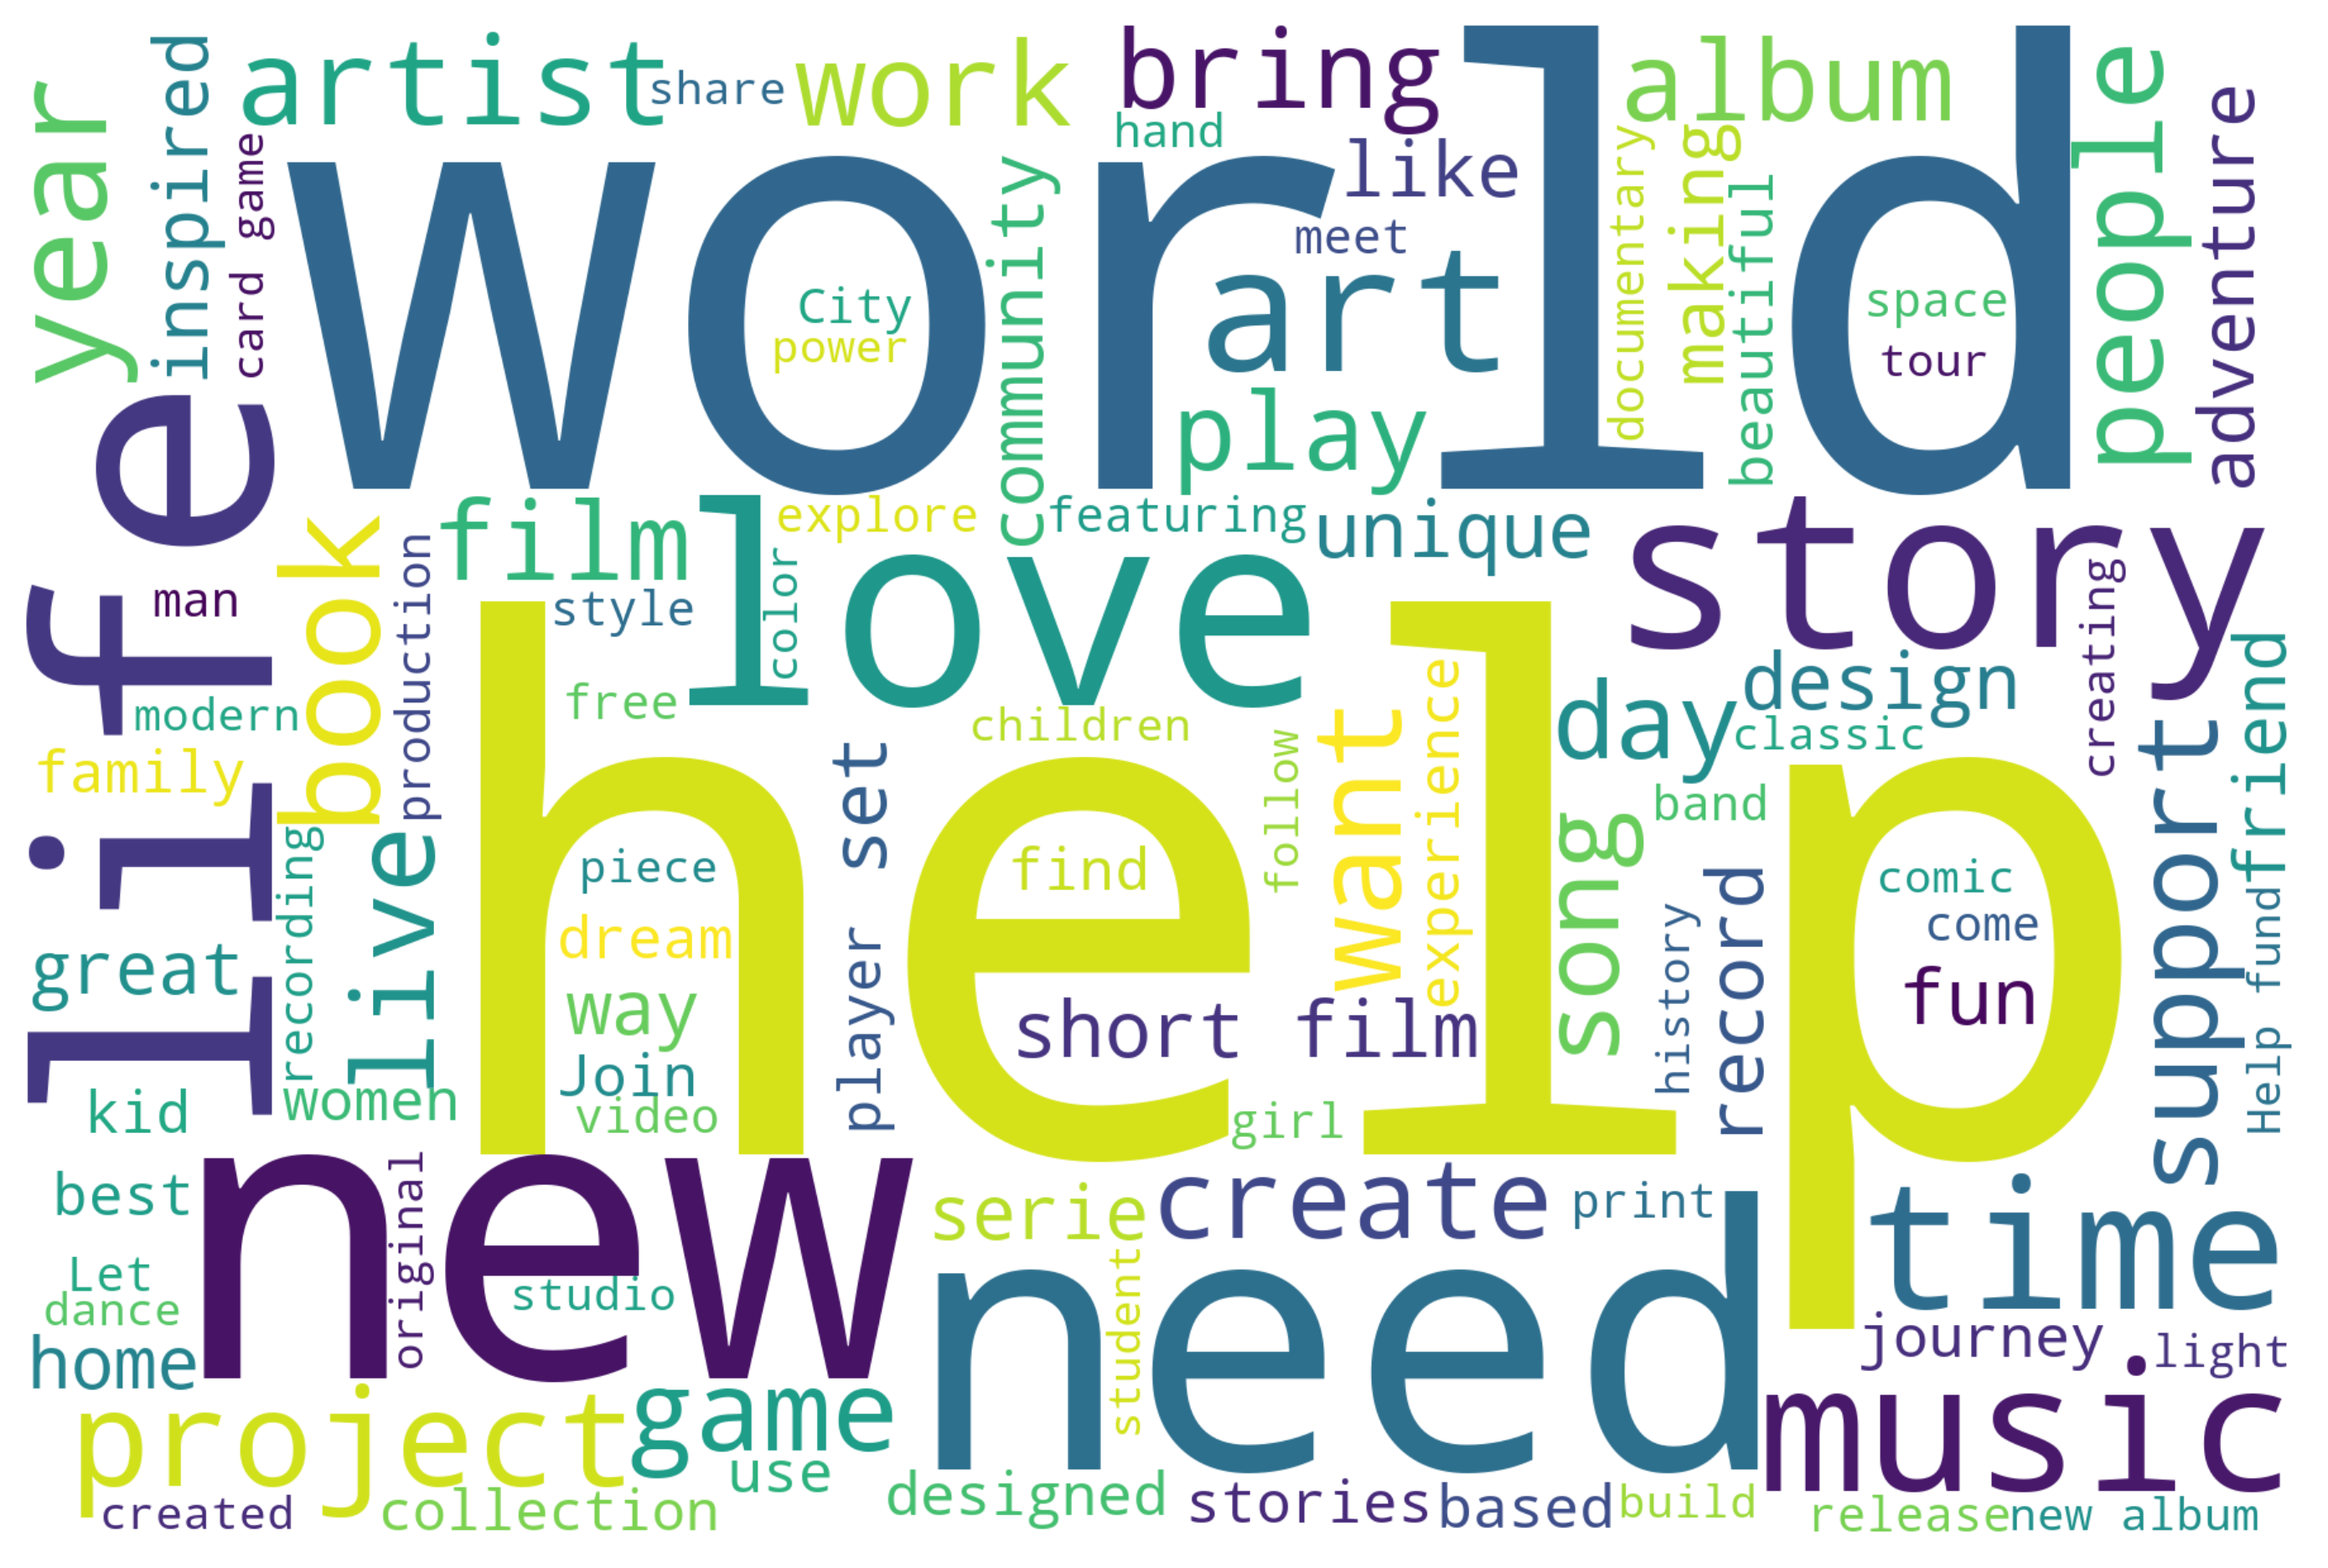

In [27]:
wc = WordCloud(width = 1800, height = 1200, stopwords = STOP_WORDS,
     background_color = 'white', min_word_length = 3, max_words = 100)

data_tech = data.query(" state == 'successful' ")['blurb']
text_tech = ' '.join(data_tech.to_list())
wc_img = wc.generate(text_tech)

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.axis("off")
plt.show()

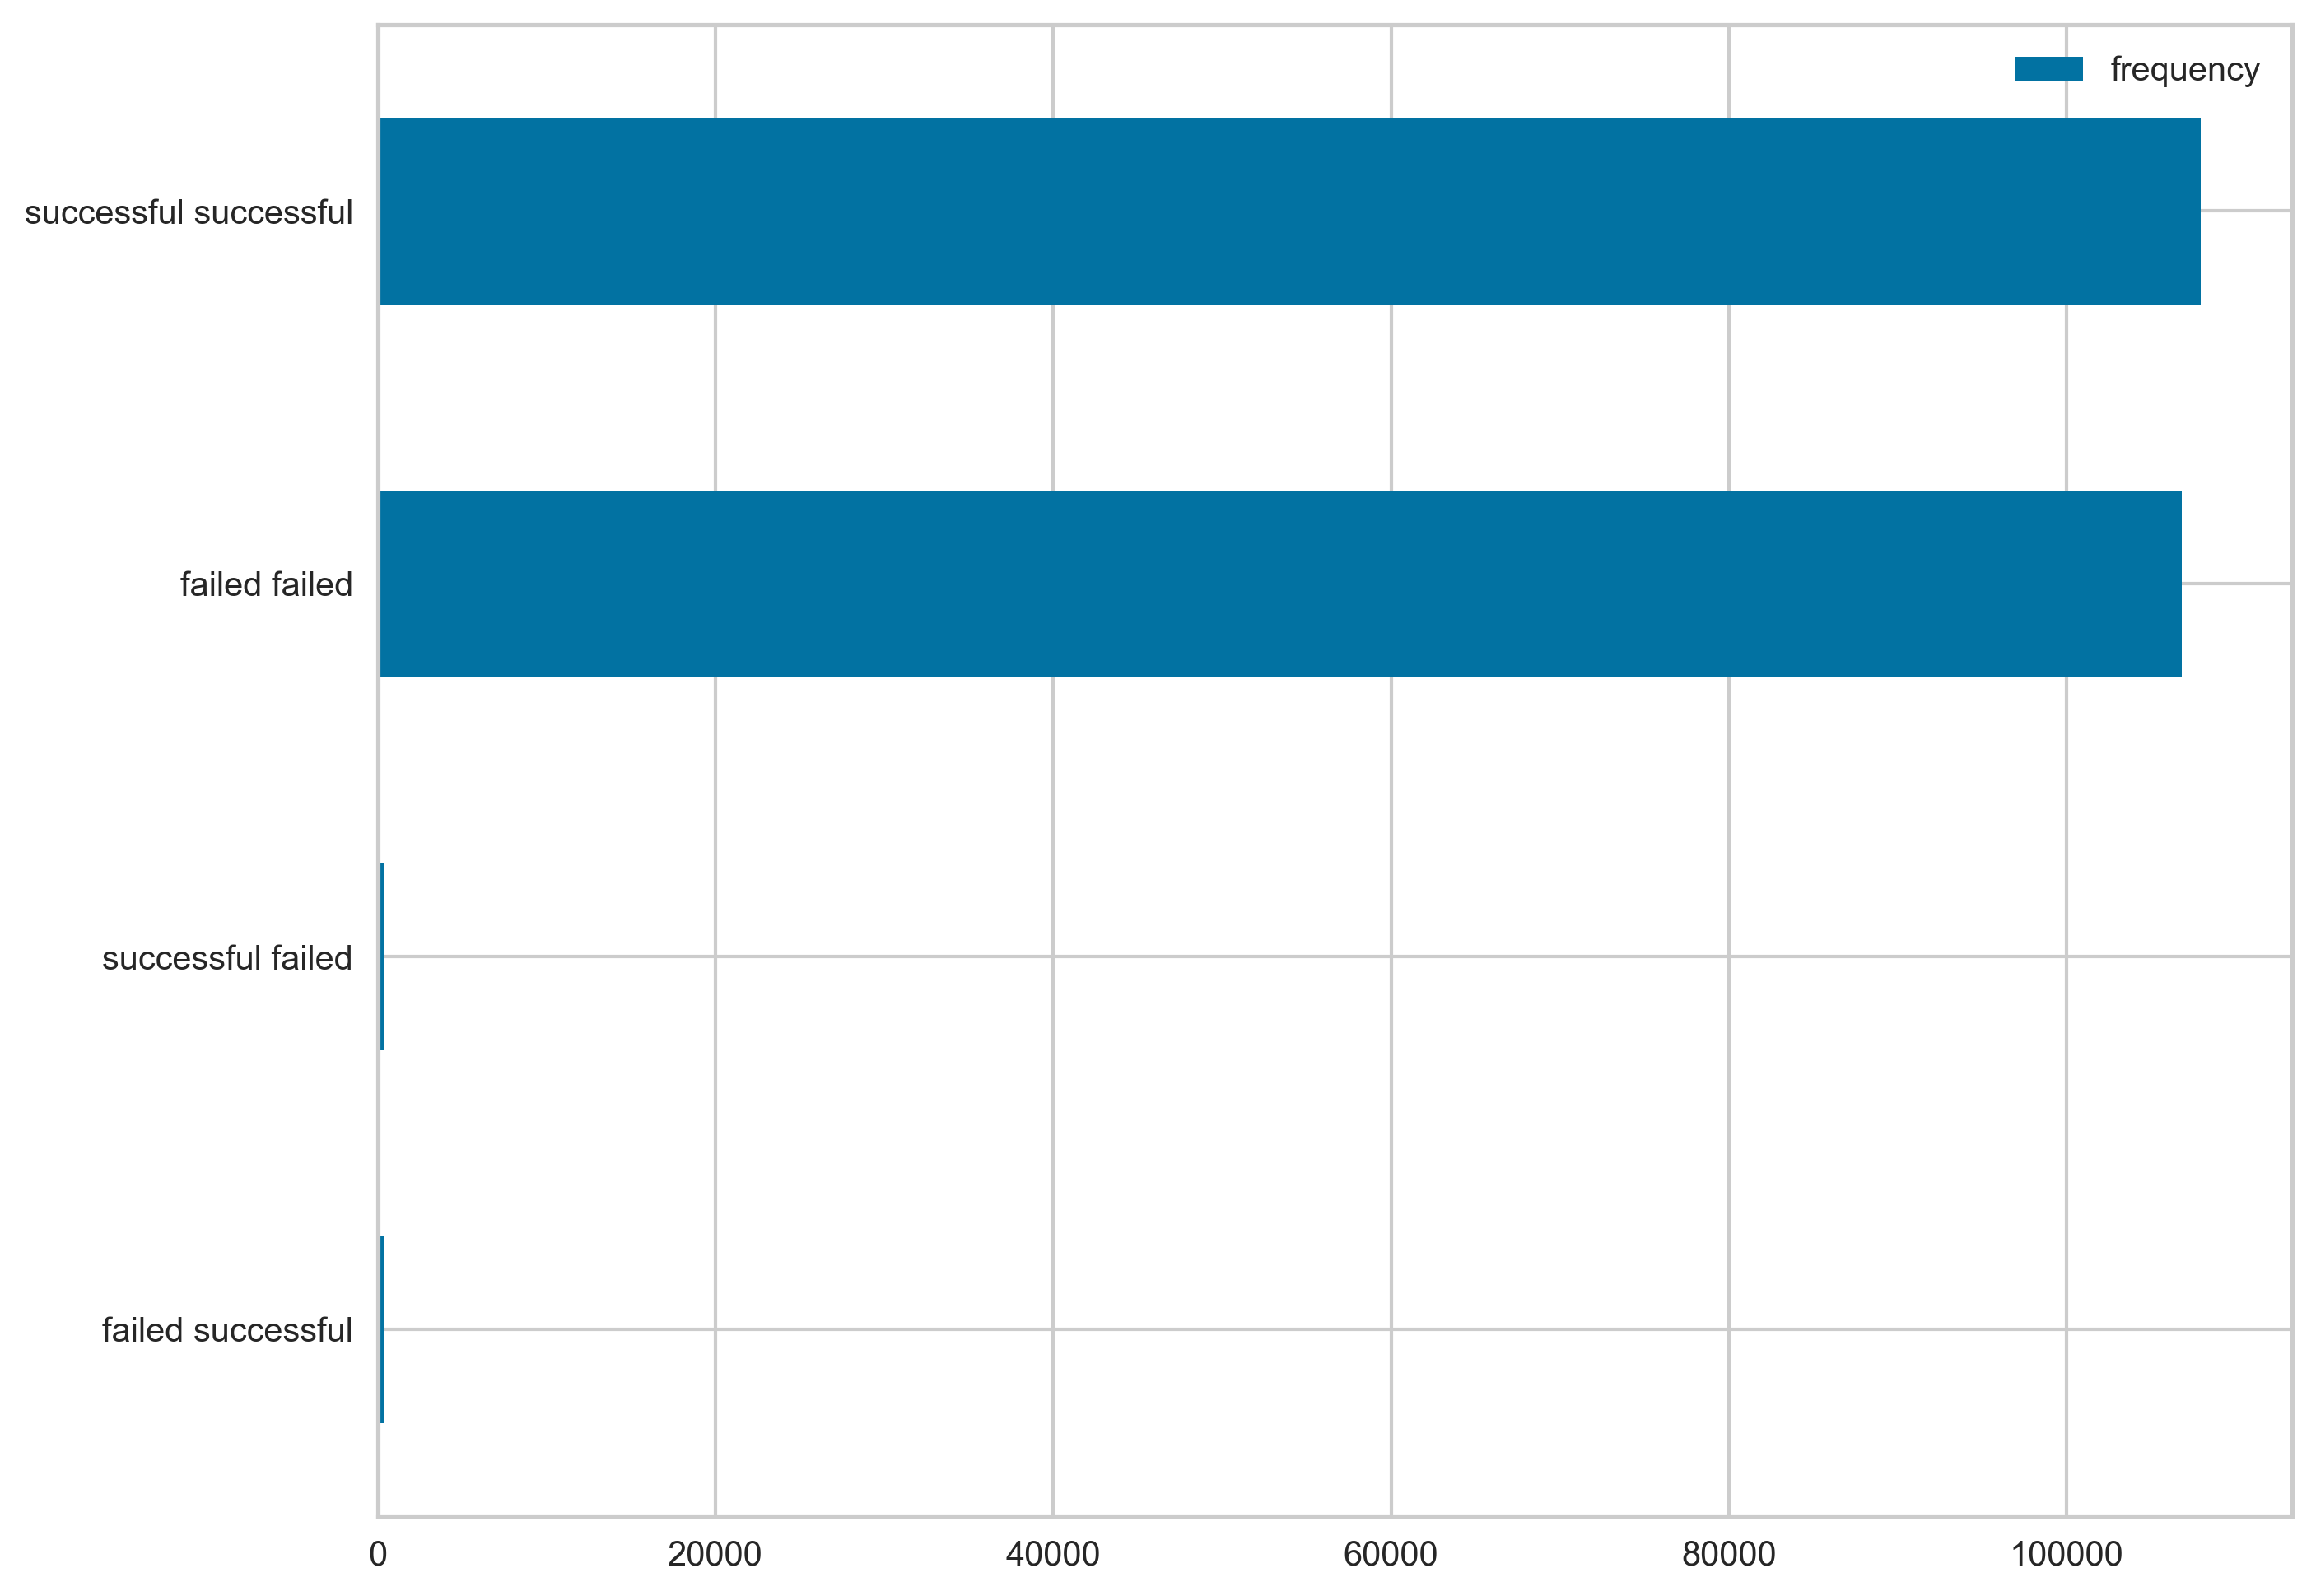

In [32]:
text = ' '.join(data['state'].to_list())
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])
df_freq = df_freq.sort_values('frequency')
df_freq[-20:].plot(kind = 'barh', figsize = (10,8))

plt.show()

In [35]:
!python -m spacy download en_core_web_sm

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


### Initializing the NLP Environment

In [36]:
nlp_ = nlp.setup(data = data, target='blurb', session_id = 628242)
data_ = nlp.get_config('data_')
data_.head(10)

Description,Value
session_id,628242
Documents,215513
Vocab Size,49486
Custom Stopwords,False


,Unnamed: 0,blurb,state
0,1,use character user go educational quest virtua...,failed
1,2,pack sensor processor ultimate stability fits_...,successful
2,3,small press run collective author want self_pu...,failed
3,4,fund new cosplay photoshoot share cuteness world,failed
4,5,hatoful boyfriend meet skeleton comedy put ful...,failed
5,6,go fastman shoe run platform dodge obstacle,failed
6,7,dark somber survival hope inspire,failed
7,8,next_generation combat online level arsenal sh...,failed
8,9,whip around planet smash way victory video gam...,failed
9,10,sneak find treasure avoid cat collect loot tim...,failed


### Creating and Assigning the Topic Model

In [37]:
cols = ['Topic_0','Topic_1','Topic_2',
        'Topic_3','Topic_4','state']

lda = nlp.create_model('lda', num_topics = 5)
data_assigned = nlp.assign_model(lda)
data_assigned_ = data_assigned[cols]

data_assigned_.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,state
0,0.303711,0.139481,0.085440,0.184894,0.286474,failed
1,0.318231,0.143016,0.099827,0.191205,0.247722,successful
2,0.309312,0.136259,0.086955,0.182434,0.285040,failed
3,0.306190,0.140499,0.091286,0.187951,0.274075,failed
4,0.301135,0.137988,0.088648,0.203579,0.268650,failed
5,0.306371,0.153232,0.089972,0.194493,0.255932,failed
6,0.314947,0.160710,0.090499,0.189232,0.244612,failed
7,0.308699,0.138647,0.114782,0.198162,0.239711,failed
8,0.320072,0.137614,0.094377,0.184426,0.263511,failed
9,0.307785,0.138056,0.088559,0.184991,0.280609,failed


### Plotting the Topic Model

In [38]:
nlp.plot_model(model = lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.398127 -0.032294       1        1  31.699389
4      0.139733  0.343090       2        1  25.104337
3     -0.328693 -0.208791       3        1  19.426752
1     -0.290619  0.249707       4        1  14.477184
2      0.081452 -0.351712       5        1   9.292338, topic_info=            Term          Freq         Total Category  logprob  loglift
181          art  27333.000000  27333.000000  Default  30.0000  30.0000
162         help  28863.000000  28863.000000  Default  29.0000  29.0000
33           new  22478.000000  22478.000000  Default  28.0000  28.0000
235         play  17795.000000  17795.000000  Default  27.0000  27.0000
99          make  16749.000000  16749.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1286      custom   1028.698497   1029.548951   Topic5  -5.1026   2.3752
719         long   1017.198781   1018.040440   Topic5  -5.1138   2.3752
753       chance   1003.774346   1004.620665   Topic5  -5.1271   2.3751
210       player    970.497112    971.332982   Topic5  -5.1608   2.3751
9790  theatrical   1582.050457   1594.865922   Topic5  -4.6721   2.3679

[183 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
654       3  0.999786    actor
283       4  0.999687    allow
559       5  0.999125  amazing
181       5  0.999967      art
1260      4  0.999957   artist
...     ...       ...      ...
12        2  0.999883    world
1094      2  0.999865    write
230       2  0.999871     year
532       1  0.999894    young
2868      4  0.999452    youth

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 2, 3])

### Initializing the Classification Environment

In [39]:
classf = classification.setup(data_assigned_, target = 'state',
         fix_imbalance = True, train_size = 0.8, session_id = 3100, silent = True)

,Description,Value
0,session_id,3100
1,Target,state
2,Target Type,Binary
3,Label Encoded,"failed: 0, successful: 1"
4,Original Data,"(215513, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Creating the Classification Model

In [40]:
xgboost = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5168,0.5245,0.5971,0.5169,0.5541,0.0328,0.0332
1,0.5238,0.5320,0.6001,0.5231,0.5589,0.0468,0.0473
2,0.5214,0.5257,0.6198,0.5202,0.5656,0.0417,0.0425
3,0.5253,0.5342,0.5991,0.5245,0.5593,0.0498,0.0504
4,0.5256,0.5352,0.5853,0.5254,0.5537,0.0506,0.0509
5,0.5254,0.5362,0.5961,0.5247,0.5581,0.0500,0.0505
6,0.5229,0.5282,0.6021,0.5222,0.5593,0.0450,0.0456
7,0.5196,0.5255,0.5745,0.5202,0.5460,0.0386,0.0388
8,0.5174,0.5230,0.5916,0.5176,0.5521,0.0339,0.0343
9,0.5193,0.5292,0.6126,0.5187,0.5617,0.0377,0.0383


### Finalizing and Saving the Models

In [41]:
xgboost_final = classification.finalize_model(xgboost)

nlp.save_model(lda, 'lda_model')
classification.save_model(xgboost_final, 'xgboost_model')

Model Succesfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='state',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1,